In [1]:
library(statnet)
library(stats)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
EpiModel       "2.0.3"   "2.1.0"  "4.0.5"
ergm           "3.11.0"  "4.1.2"  "4.0.5"
ergm.count     "3.4.0"   "4.0.2"  "4.0.5"
ergm.ego       "0.6.1"   "1.0.0"  "4.0.5"
ergm.rank      "1.2.0"   "4.0.0"  "4.0.5"
network        "1.16.1"  "1.17.1" "4.0.5"
networkDynamic "0.10.1"  "0.11.0" "4.0.5"
statnet.common "4.4.1"   "4.5.0"  "4.0.5"
tergm          "3.7.0"   "4.0.2"  "4.0.5"


Restart R and use "statnet::update_statnet()" to get the updates.



In [2]:
el_dist = read.csv("../data/features/dist.csv", stringsAsFactors = FALSE)
el_dist$log_dist = log(el_dist$dist)
dist_net = network(el_dist, directed = TRUE, matrix.type = "edgelist")
set.edge.value(dist_net, "dist", el_dist$dist)
set.edge.value(dist_net, "log_dist", el_dist$log_dist)
dist_net

 Network attributes:
  vertices = 174 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 30276 
    missing edges= 0 
    non-missing edges= 30276 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [3]:
el_diplomatic = read.csv("../data/features/dip_exhange_clean.csv", stringsAsFactors = FALSE)
diplomatic_exchange_net = network(el_diplomatic, directed = TRUE, matrix.type = "edgelist")
diplomatic_exchange_net

 Network attributes:
  vertices = 174 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 7850 
    missing edges= 0 
    non-missing edges= 7850 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [4]:
el = read.csv("../data/edgelist_2011.csv", stringsAsFactors = FALSE)
nl = read.csv("../data/nodelist_2011.csv", stringsAsFactors = FALSE)

In [5]:
nl$gdp_us_dollar <- log(nl$gdp_us_dollar)
nl$log_area <- log(nl$area)
nl$log_population <- log(nl$population)
nl$log_gdp_per_capita <- log(nl$gdp_per_capita)
nl$log_gni_atlas <- log(nl$gni_atlas)

In [6]:
nl$scaled_gdp_us_dollar = as.numeric(scale(nl$gdp_us_dollar))
nl$scaled_gdp_growth = as.numeric(scale(nl$gdp_growth))
nl$scaled_inflation_rate = as.numeric(scale(nl$inflation_rate))
nl$scaled_population = as.numeric(scale(nl$log_population))
nl$scaled_gdp_per_capita = as.numeric(scale(nl$log_gdp_per_capita))
nl$scaled_life_expectancy = as.numeric(scale(nl$life_expectancy))
nl$scaled_gni_atlas = as.numeric(scale(nl$log_gni_atlas))
nl$scaled_agriculture_forestry_fishing_of_gdp = as.numeric(scale(nl$agriculture_forestry_fishing_of_gdp))
nl$scaled_industry_of_gdp = as.numeric(scale(nl$industry_of_gdp))
nl$scaled_merchandise_of_gdp = as.numeric(scale(nl$merchandise_of_gdp))
nl$scaled_net_barrier_of_trade = as.numeric(scale(nl$net_barrier_of_trade))
nl$scaled_foreign_direct_investment_inflows = as.numeric(scale(nl$foreign_direct_investment_inflows))

In [7]:
net = network(el, directed = TRUE, matrix.type = 'edgelist', vertex.attr=nl, vertex.attrnames=colnames(nl), ignore.eval = FALSE, names.eval='trade')
set.edge.value(net, "trade", el$weight)
net

 Network attributes:
  vertices = 174 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 3595 
    missing edges= 0 
    non-missing edges= 3595 

 Vertex attribute names: 
    agriculture_forestry_fishing_of_gdp area colonizer continent country_iso3 foreign_direct_investment_inflows gdp_growth gdp_per_capita gdp_us_dollar gni_atlas industry_of_gdp inflation_rate landlocked langoff_1 life_expectancy log_area log_gdp_per_capita log_gni_atlas log_population merchandise_of_gdp net_barrier_of_trade population scaled_agriculture_forestry_fishing_of_gdp scaled_foreign_direct_investment_inflows scaled_gdp_growth scaled_gdp_per_capita scaled_gdp_us_dollar scaled_gni_atlas scaled_industry_of_gdp scaled_inflation_rate scaled_life_expectancy scaled_merchandise_of_gdp scaled_net_barrier_of_trade scaled_population vertex.names 

 Edge attribute names not shown 

In [8]:
model = ergm(
                        net ~
                        edges +
                        mutual +
                        nodecov("scaled_gdp_us_dollar") +
                        absdiff("scaled_gdp_us_dollar") +
                        nodecov("scaled_inflation_rate") +
                        absdiff("scaled_inflation_rate") +
                        nodecov("scaled_gdp_growth") +
                        absdiff("scaled_gdp_growth") +
                        nodematch("colonizer") +
                        nodematch("continent") +
                        nodematch("landlocked") +
                        nodematch("langoff_1") +
                        edgecov(diplomatic_exchange_net) +
                        nodecov("scaled_population") +
                        nodecov("scaled_life_expectancy") +
                        nodecov("scaled_gni_atlas") +
                        nodecov("scaled_agriculture_forestry_fishing_of_gdp") +
                        nodecov("scaled_industry_of_gdp") +
                        nodecov("scaled_merchandise_of_gdp") +
                        nodecov("scaled_net_barrier_of_trade") +
                        nodecov("scaled_foreign_direct_investment_inflows")
                )

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 1.164.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.5938.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



In [9]:
summary(model)

Call:
ergm(formula = net ~ edges + mutual + nodecov("scaled_gdp_us_dollar") + 
    absdiff("scaled_gdp_us_dollar") + nodecov("scaled_inflation_rate") + 
    absdiff("scaled_inflation_rate") + nodecov("scaled_gdp_growth") + 
    absdiff("scaled_gdp_growth") + nodematch("colonizer") + nodematch("continent") + 
    nodematch("landlocked") + nodematch("langoff_1") + edgecov(diplomatic_exchange_net) + 
    nodecov("scaled_population") + nodecov("scaled_life_expectancy") + 
    nodecov("scaled_gni_atlas") + nodecov("scaled_agriculture_forestry_fishing_of_gdp") + 
    nodecov("scaled_industry_of_gdp") + nodecov("scaled_merchandise_of_gdp") + 
    nodecov("scaled_net_barrier_of_trade") + nodecov("scaled_foreign_direct_investment_inflows"))

Iterations:  2 out of 20 

Monte Carlo MLE Results:
                                                   Estimate Std. Error MCMC %
edges                                              -1.93871    0.06191      0
mutual                                           

In [10]:
gof <- gof(model ~ model + distance + dspartners + odegree + idegree + triadcensus)

In [11]:
gof


Goodness-of-fit for model statistics 

                                                         obs        min
edges                                              3594.0000 3452.00000
mutual                                              324.0000  266.00000
nodecov.scaled_gdp_us_dollar                       -569.9575 -707.82873
absdiff.scaled_gdp_us_dollar                       4588.6487 4354.83973
nodecov.scaled_inflation_rate                      -149.1085 -346.06915
absdiff.scaled_inflation_rate                      3086.4781 2887.53406
nodecov.scaled_gdp_growth                           245.1728   36.95796
absdiff.scaled_gdp_growth                          2456.0285 2297.07462
nodematch.colonizer                                1244.0000 1158.00000
nodematch.continent                                 524.0000  463.00000
nodematch.landlocked                               2208.0000 2102.00000
nodematch.langoff_1                                 280.0000  222.00000
edgecov.diplomatic_excha

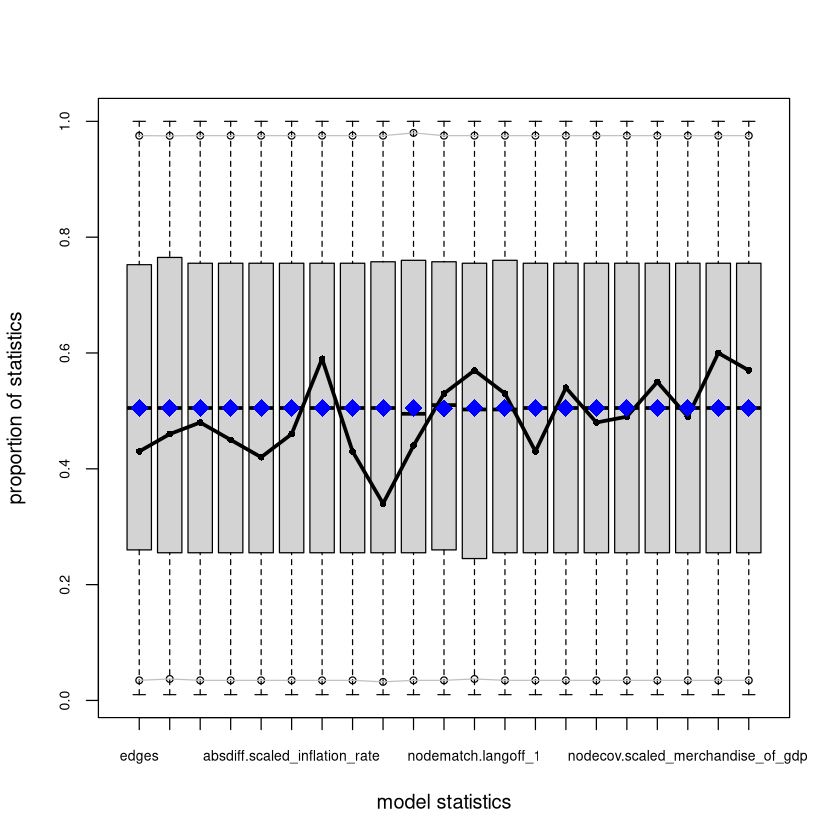

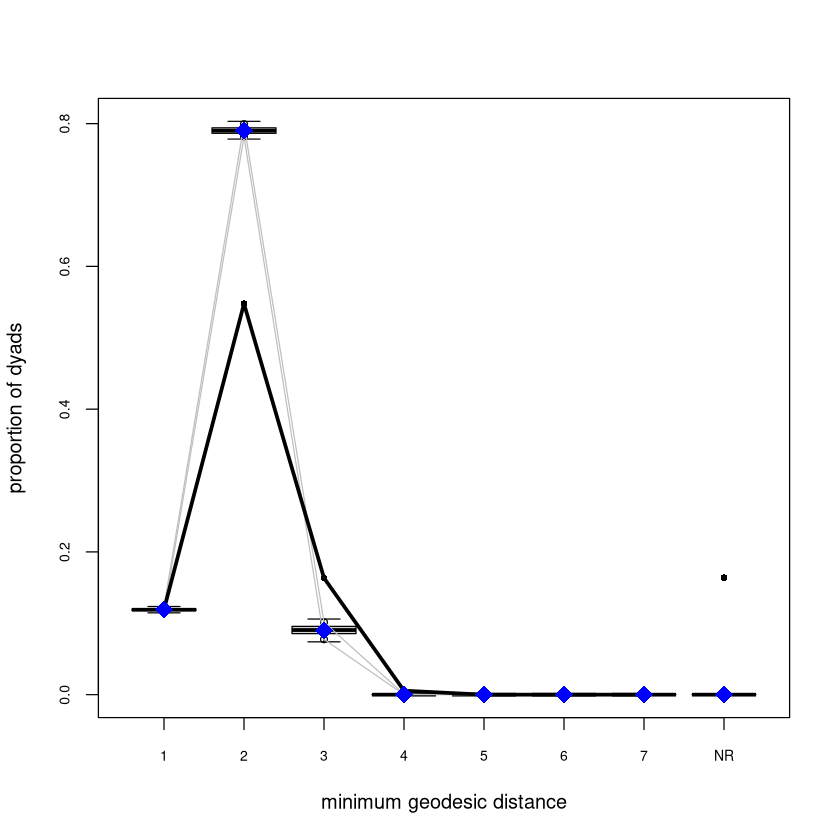

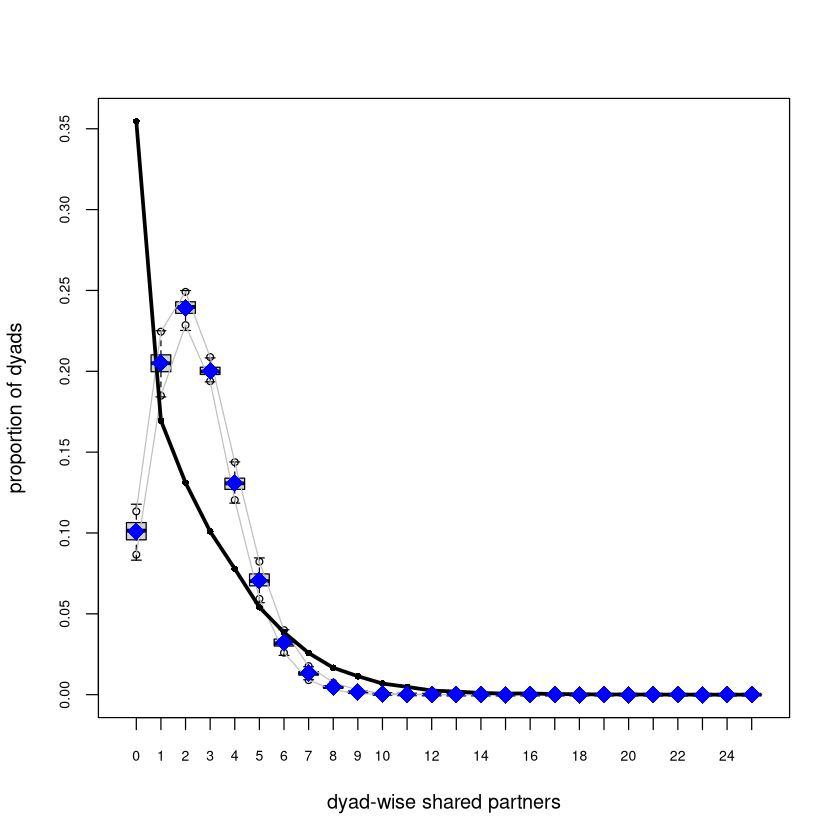

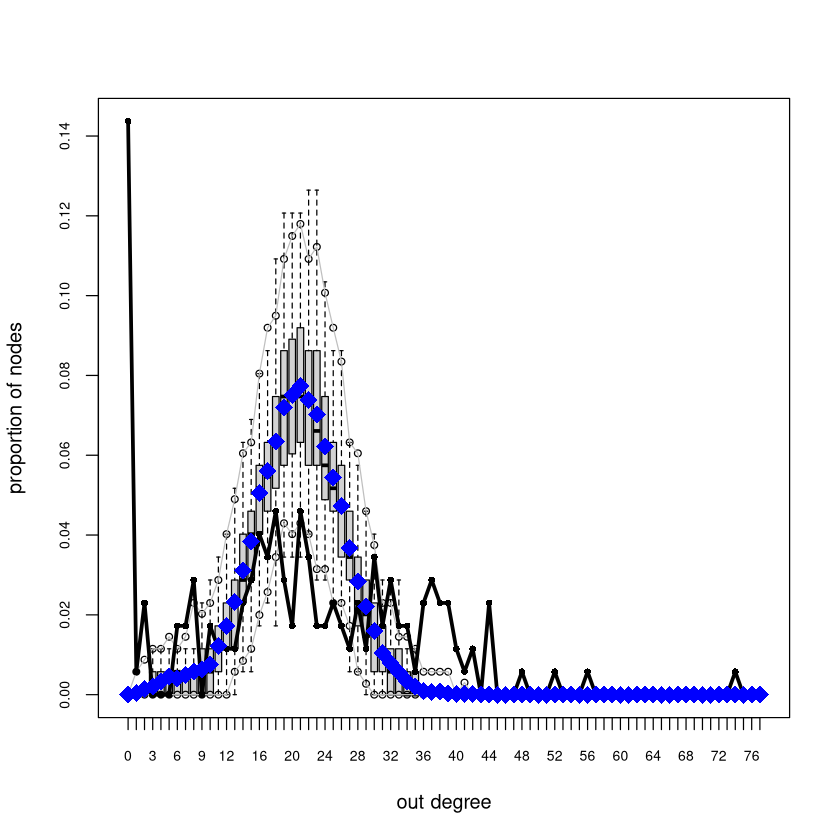

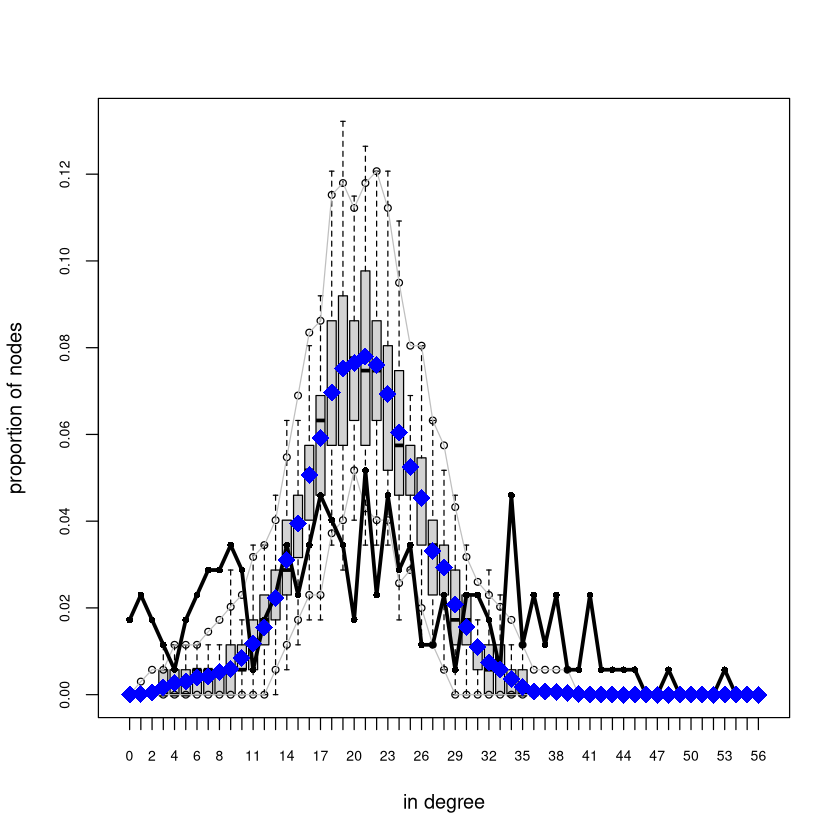

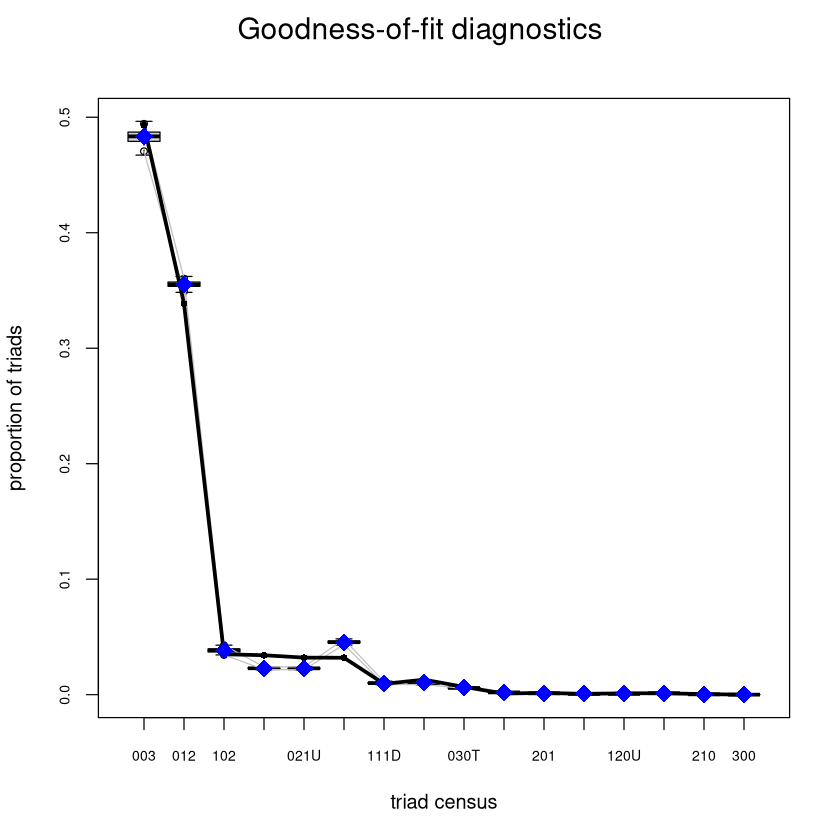

In [12]:
plot(gof)

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                                                      Mean    SD Naive SE
edges                                               20.723 56.65   0.8852
mutual                                               5.425 18.29   0.2859
nodecov.scaled_gdp_us_dollar                        -6.339 67.29   1.0513
absdiff.scaled_gdp_us_dollar                        31.977 87.43   1.3661
nodecov.scaled_inflation_rate                       21.973 76.41   1.1939
absdiff.scaled_inflation_rate                       37.706 79.77   1.2465
nodecov.scaled_gdp_growth                           -8.835 64.71   1.0111
absdiff.scaled_gdp_growth                           23.808 66.64   1.0413
nodematch.colonizer                                 17.667 31.92   0.4988
nodematch.continent          

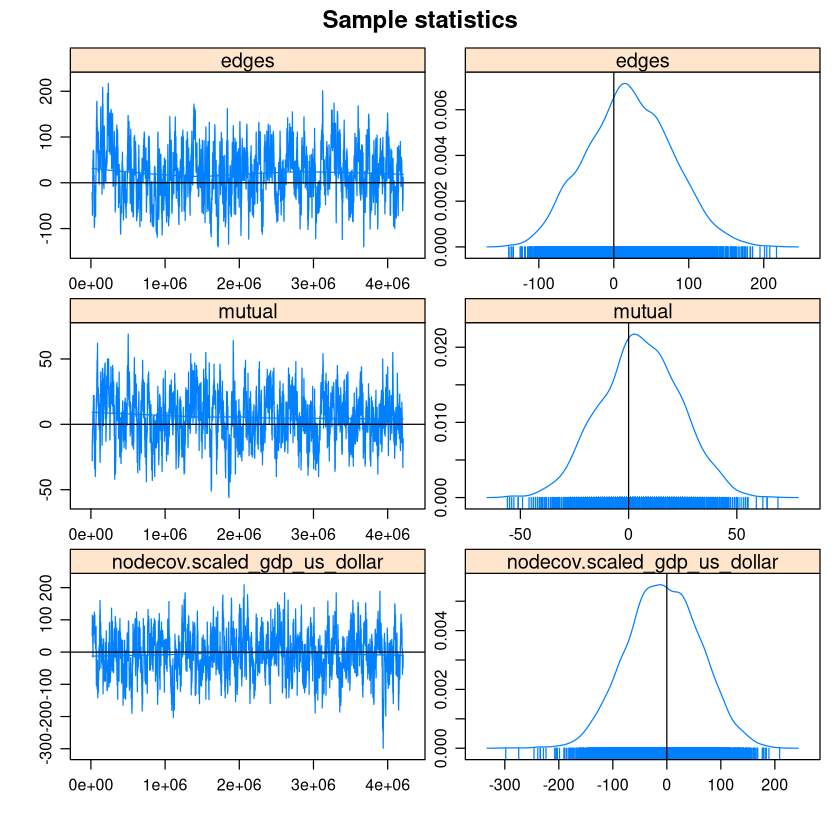

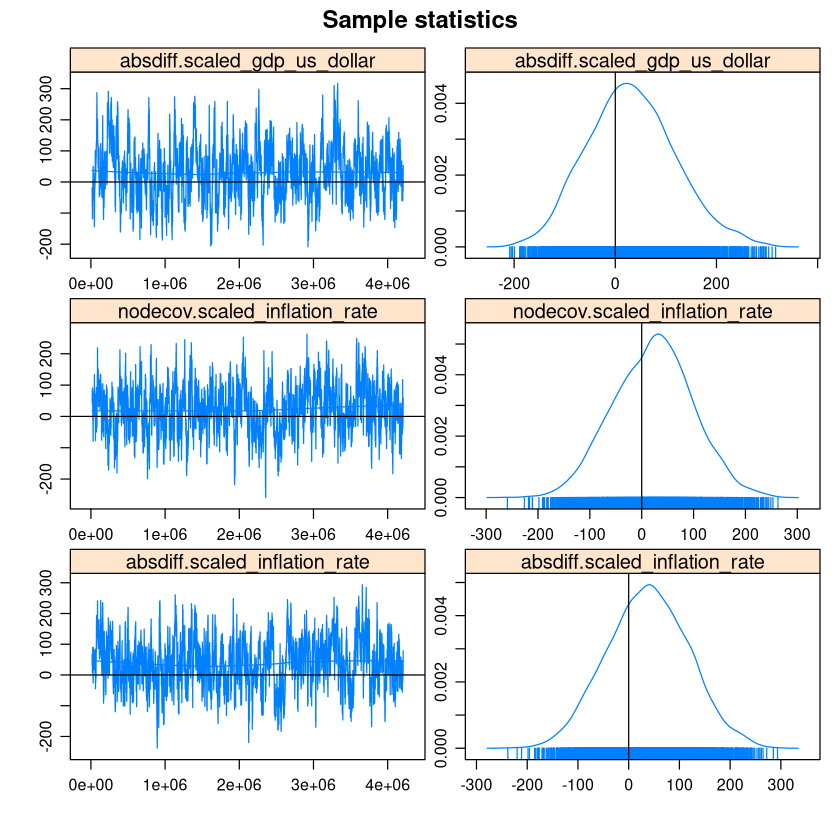

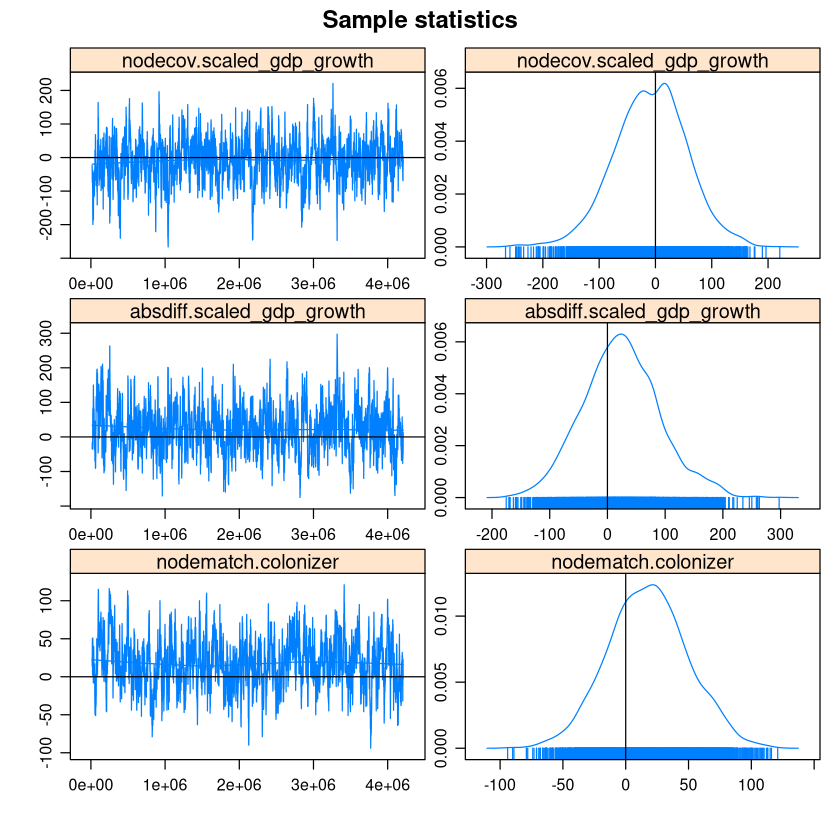

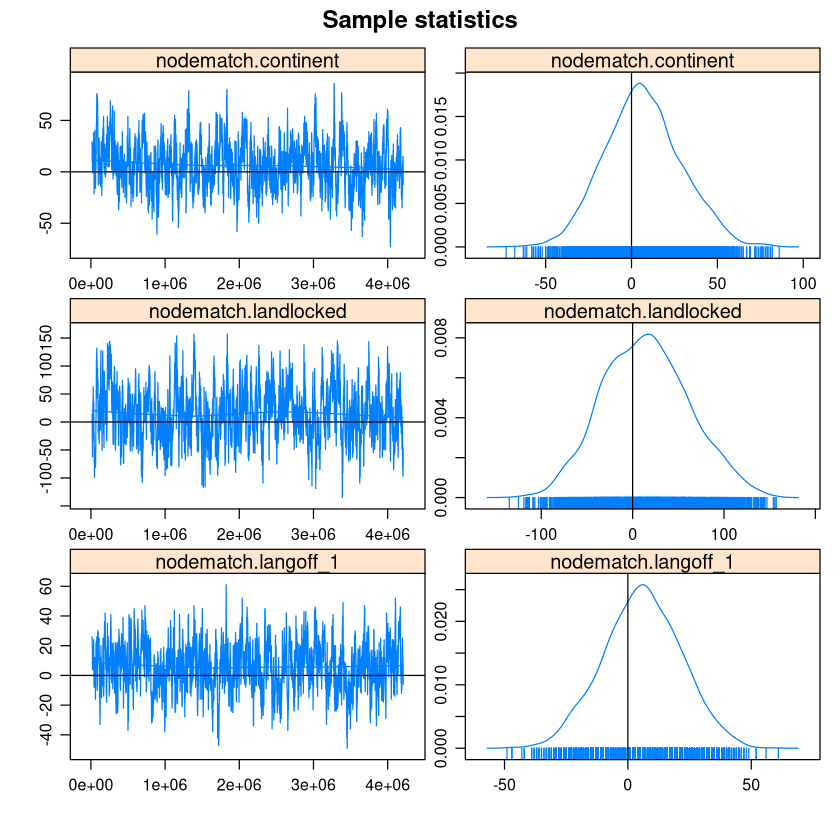

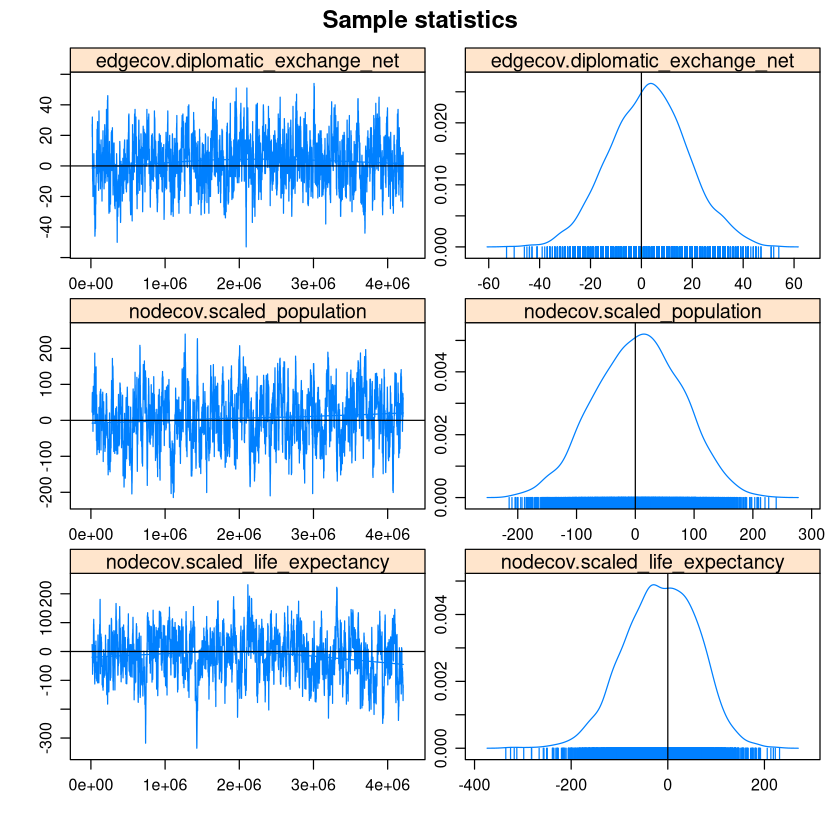

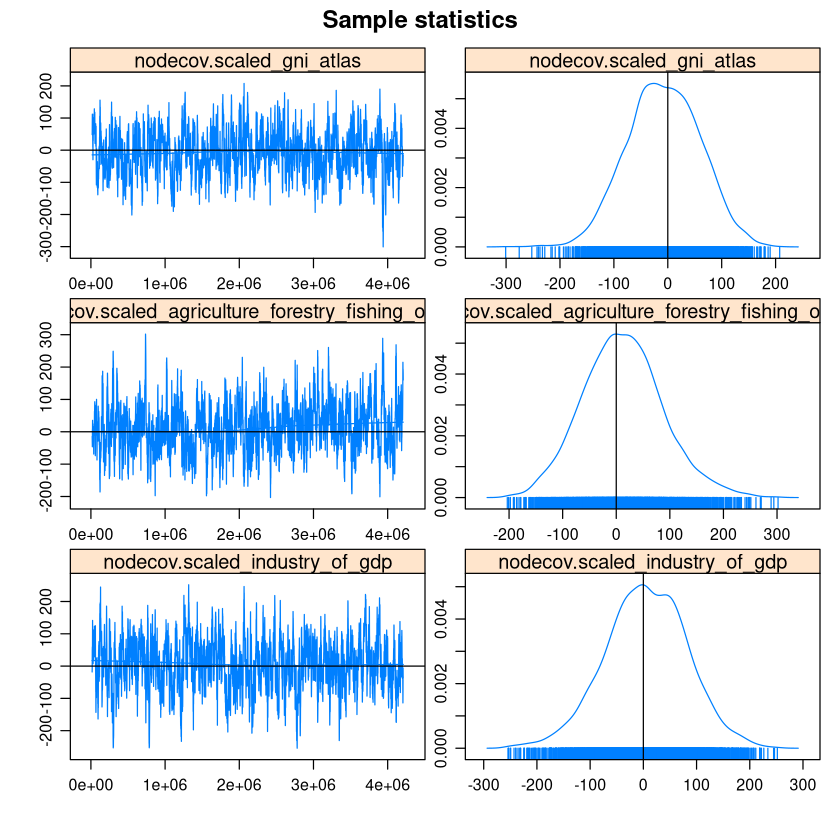


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


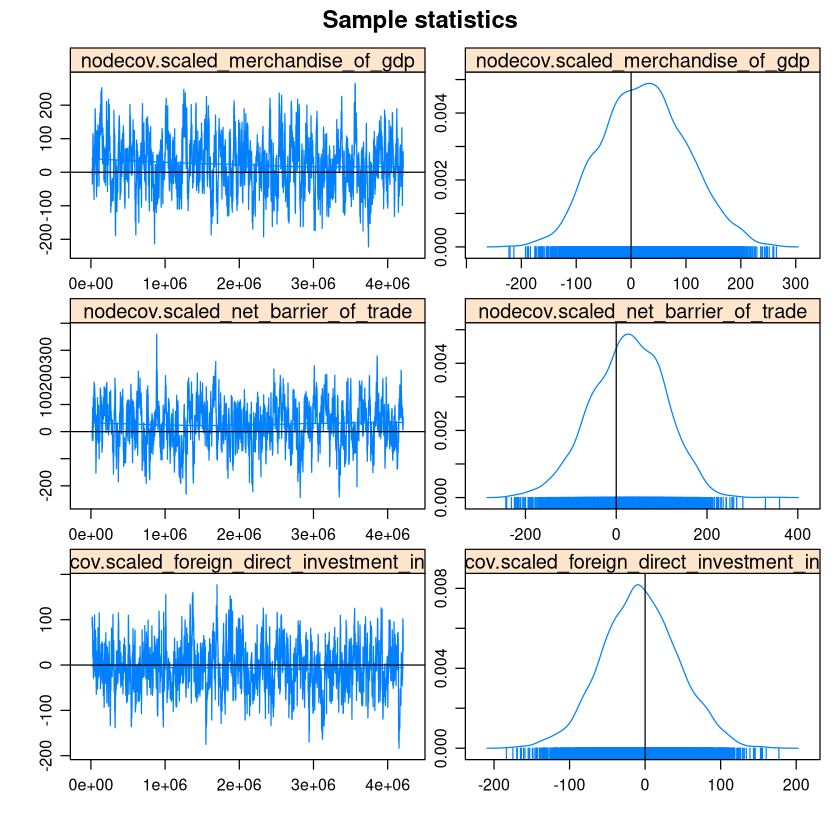

In [13]:
mcmc.diagnostics(model)